In [1]:
import numpy as np 

import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt

/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
ds = xr.open_mfdataset("/project/amp/jcaron/CPC_Tminmax/tmax.*.nc")
tmax = ds['tmax']
dl = xr.open_mfdataset("/project/amp/brianpm/TemperatureExtremes/Derived/CPC_tmax_dayofyear_quantiles_15daywindow_c20190622.nc")


In [3]:
ds.coords['lat']


<xarray.DataArray 'lat' (lat: 360)>
array([ 89.75,  89.25,  88.75, ..., -88.75, -89.25, -89.75], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Attributes:
    actual_range:        [ 89.75 -89.75]
    long_name:           Latitude
    units:               degrees_north
    axis:                Y
    standard_name:       latitude
    coordinate_defines:  center

In [4]:
dl.coords['lat']

<xarray.DataArray 'lat' (lat: 360)>
array([ 89.75,  89.25,  88.75, ..., -88.75, -89.25, -89.75], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Attributes:
    actual_range:        [ 89.75 -89.75]
    long_name:           Latitude
    units:               degrees_north
    axis:                Y
    standard_name:       latitude
    coordinate_defines:  center

In [5]:
de = xr.open_mfdataset("/project/amp/brianpm/TemperatureExtremes/Regridded/f.e13.FAMIPC5CN.ne30_ne30.beta17.t3.cam.h1.TREFMXAV.19650101-20051231.regrid.nc")
tmax1 = de['TREFMXAV'].compute()

In [6]:
time = ds['time'].load()

In [16]:
time1 = de['time'].isel(time=slice(0,-1)).load()

In [17]:
tmax2 = dl['tmax'].load()

In [18]:
tmax2

<xarray.DataArray 'tmax' (time: 366, quantile: 9, lat: 360, lon: 720)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]],


       ...,


       [[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]]])
Coordinates:
  * quantile  (quantile) float64 0.01 0.05 0.1 0.25 0.5 0.75 0.9 0.95 0.99
  * lat       (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon       (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
Dimensions without coordinates: time
Attributes:
    long_name:  Daily Maximum Temperature
    units:      degC

In [19]:
tmax2['time'] = np.arange(1,367)


In [20]:
tmax_90th = tmax2.sel(quantile=0.9)

In [21]:
tmax_90th

<xarray.DataArray 'tmax' (time: 366, lat: 360, lon: 720)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
    quantile  float64 0.9
  * lat       (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon       (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * time      (time) int64 1 2 3 4 5 6 7 8 9 ... 359 360 361 362 363 364 365 366
Attributes:
    long_name:  Dail

(array([  32633.,  346618.,  955879., 1730586., 2915251., 2802999.,
        3775241., 7258591., 4890836.,  510962.]),
 array([-38.41078415, -29.46613472, -20.52148529, -11.57683586,
         -2.63218643,   6.312463  ,  15.25711243,  24.20176186,
         33.14641129,  42.09106071,  51.03571014]),
 <a list of 10 Patch objects>)

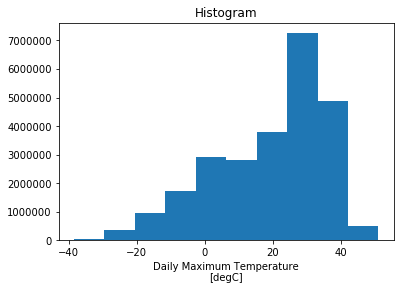

In [22]:
month_names = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
lons, lats = np.meshgrid(tmax_90th['lon'], tmax_90th['lat'])  # this creates arrays of longitude and latitude





In [23]:
import cartopy.crs as ccrs

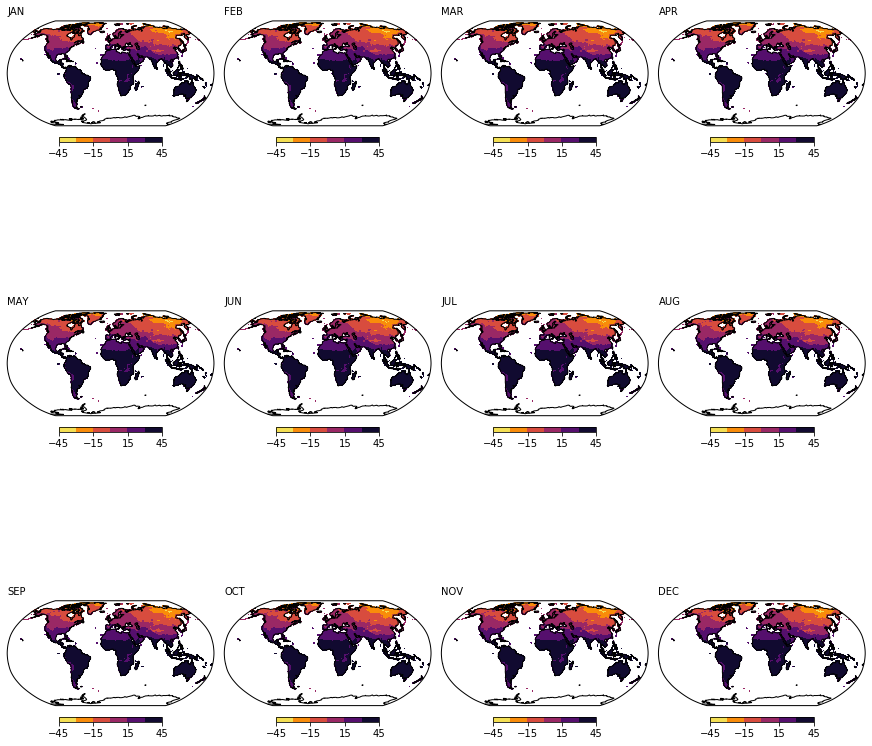

In [197]:
fig, ax = plt.subplots(figsize=(12,12), nrows=3, ncols=4, subplot_kw={"projection":ccrs.Robinson()}, constrained_layout=True)

for i, a in enumerate(ax.ravel()):
    im = a.contourf(lons, lats, tmax_90th.isel(time=i),transform=ccrs.PlateCarree(), cmap='inferno_r')
    a.coastlines()
    cbar = fig.colorbar(im, ax=a, shrink=0.5, orientation='horizontal')
    # reduce ticks:
    clr_ticks = cbar.get_ticks()
    cbar.set_ticks(clr_ticks[::2])  
    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    a.set_global()
    a.set_title(month_names[i], loc='left', fontsize=10)

In [3]:
cmich = (43. + 35/60,  360. - (84. + 46/60))
atlanta = (33. + 45/60,  360. - (84. + 23/60))

In [4]:
atlanta_tmax = tmax.sel(lat=atlanta[0], lon=atlanta[1], method='nearest').isel(time=slice(0,-1))
cmich_tmax = tmax.sel(lat=cmich[0], lon=cmich[1], method='nearest').isel(time=slice(0,-1))

In [208]:
atlanta_tmax2 = tmax_90th.sel(lat=atlanta[0], lon=atlanta[1], method='nearest')

In [209]:
atlanta_tmax2.load()

<xarray.DataArray 'tmax' (time: 366)>
array([18.769857, 18.693696, 18.691326, ..., 18.764643, 18.789009, 18.769857])
Coordinates:
    quantile  float64 0.9
    lat       float32 33.75
    lon       float32 275.75
  * time      (time) int64 1 2 3 4 5 6 7 8 9 ... 359 360 361 362 363 364 365 366
Attributes:
    long_name:  Daily Maximum Temperature
    units:      degC

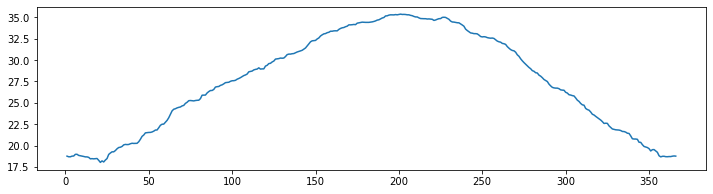

In [229]:
fig001, ax001 = plt.subplots(figsize=(12,3))
ax001.plot(atlanta_tmax2['time'],atlanta_tmax2)
#np.values((x = 228), color='k', linestyle='dashed', linewidth=2.5))

In [235]:
import cftime
ttime = cftime.num2date(np.arange(365), "days since 0001-01-01",calendar= 'standard')

In [240]:
t90_doy = tmax_90th.rename({'time':'dayofyear'})

In [241]:
tdiff = tmax.groupby('time.dayofyear') - t90_doy

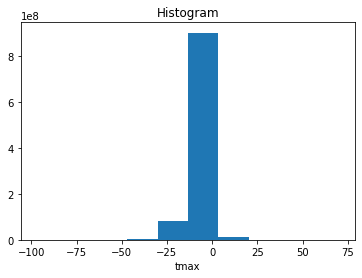

In [243]:
tdiff.plot()
bin = 10

In [244]:
atlanta_tmax3 = tdiff.sel(lat=atlanta[0], lon=atlanta[1], method='nearest')

/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


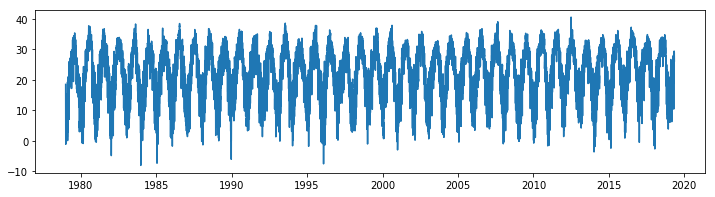

In [9]:
fig001, ax001 = plt.subplots(figsize=(12,3))
ax001.plot(atlanta_tmax['time'], atlanta_tmax)

In [5]:
def degC_to_degF(C):
    return C * (9./5.) + 32.

def plot_stack_months(ts, month):
    month_length = {1: 31, 2: 28, 3: 31, 4: 30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
    month_data = ts[ts['time.month'] == month]
    fig, ax = plt.subplots(figsize=(10,5))
    ax2 = ax.twinx()
    ax2.set_ylabel('Fahrenheit')
    years = set(month_data['time.year'].values)
    n = len(years)
    colors = mpl.cm.Greys(np.linspace(0,1,n))
    ndays = month_length[month]
    for i, year in enumerate(years):
        ax.plot(np.arange(ndays), month_data[month_data['time'].dt.year == year], color=colors[i], label=year)
    ax.set_xlabel("Day of Month")
    ax.set_ylabel("T$_{\mathrm{max}}$ [degC]")
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #fig.legend(ncol=4, bbox_to_anchor=(0, 0.5, 1, 1), loc=5, borderaxespad=0.2)
    y1,y2 = ax.get_ylim()
    ax2.set_ylim(degC_to_degF(y1), degC_to_degF(y2))
    ax.axhline(np.nanquantile(month_data,.90), color='k', linestyle='dashed', linewidth=2.5)
    return fig, ax

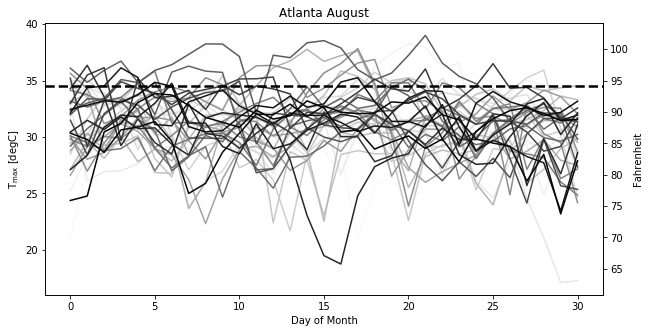

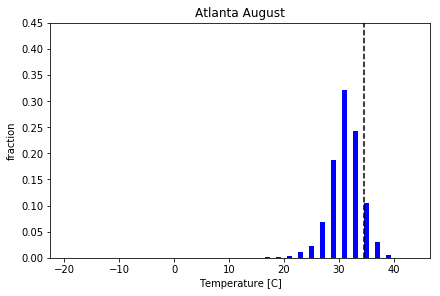

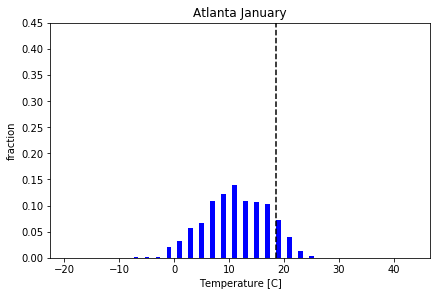

In [7]:
f006,ax006 = plot_stack_months(atlanta_tmax,8)
ax006.set_title('Atlanta August')
f006.savefig('/home/akwilson/Pictures/EWSS.eps')

def plot_hist_month(ts,month):
    
    month_data = ts[ts['time.month'] == month]
    h, edges = np.histogram(month_data, bins=np.arange(-20, 45, 2), density=True)
    bin_centers = edges[:-1:] + 0.5*np.diff(edges)  # take all but the last edge and add the half-width of the bin
    # to transform from "density" to hprime so that the sum of hprime = 1
    hprime = h / h.sum()  # has units of "fraction of data set" and sums to 1.0
    fig, ax = plt.subplots(constrained_layout=True)
    ax.bar(bin_centers, hprime, color ='b')
    ax.set_ylabel('fraction')
    ax.axvline(np.nanquantile(month_data,.90), color='k', linestyle='dashed', linewidth=1.5)
    return fig, ax

f007,ax007 = plot_hist_month(atlanta_tmax,8)
ax007.set_title('Atlanta August')
ax007.set_ylim(0,.45)
ax007.set_xlabel('Temperature [C]')
f007.savefig('/home/akwilson/Pictures/EWSS1.eps')

f008,ax008 = plot_hist_month(atlanta_tmax,1)
ax008.set_title('Atlanta January')
ax008.set_ylim(0,.45)
ax008.set_xlabel('Temperature [C]')
f008.savefig('/home/akwilson/Pictures/EWSS2.eps')

IndexError: Boolean array size 14736 is used to index array with shape (14735,).

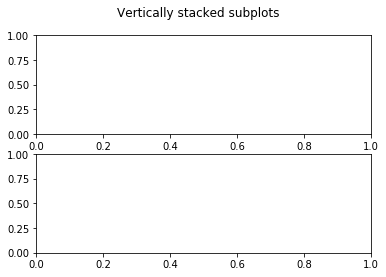

In [37]:
def plot_hist_month(ts,month):
    
    month_data = ts[ts['time.month'] == month]
    h, edges = np.histogram(month_data, bins=np.arange(-20, 45, 2), density=True)
    bin_centers = edges[:-1:] + 0.5*np.diff(edges)  # take all but the last edge and add the half-width of the bin
    # to transform from "density" to hprime so that the sum of hprime = 1
    hprime = h / h.sum()  # has units of "fraction of data set" and sums to 1.0
    fig, ax = plt.subplots(constrained_layout=True)
    ax.bar(bin_centers, hprime, color ='black')
    ax.set_ylabel('fraction')
    ax.axvline(np.nanquantile(month_data,.90), color='k', linestyle='dashed', linewidth=1.5)
    return fig, ax


fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(atlanta_tmax[time==8])
ax2.plot(atlanta_tmax[time==1])

Text(0.5, 0, 'Temperature [C]')

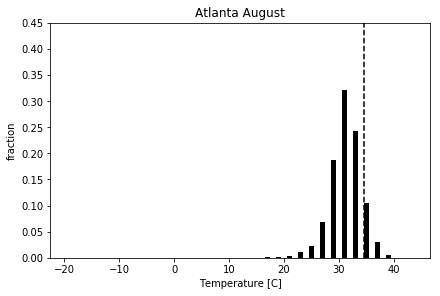

In [21]:
def plot_hist_month(ts,month):
    
    month_data = ts[ts['time.month'] == month]
    h, edges = np.histogram(month_data, bins=np.arange(-20, 45, 2), density=True)
    bin_centers = edges[:-1:] + 0.5*np.diff(edges)  # take all but the last edge and add the half-width of the bin
    # to transform from "density" to hprime so that the sum of hprime = 1
    hprime = h / h.sum()  # has units of "fraction of data set" and sums to 1.0
    fig, ax = plt.subplots(constrained_layout=True)
    ax.bar(bin_centers,hprime,color = 'black')
    ax.set_ylabel('fraction')
    ax.axvline(np.nanquantile(month_data,.90), color='k', linestyle='dashed', linewidth=1.5)
    return fig, ax

f007,ax007 = plot_hist_month(atlanta_tmax,8)
ax007.set_title('Atlanta August')
ax007.set_ylim(0,.45)
ax007.set_xlabel('Temperature [C]')

In [92]:
atlanta_tmax1 = tmax1.sel(lat=atlanta[0], lon=atlanta[1], method='nearest').isel(time=slice(0,-1))
cmich_tmax1 = tmax1.sel(lat=cmich[0], lon=cmich[1], method='nearest').isel(time=slice(0,-1))

In [67]:
atlanta_tmax.load() 


<xarray.DataArray 'tmax' (time: 14735)>
array([18.465322,  7.227199,  0.700476, ..., 28.885754, 27.883738, 26.153929],
      dtype=float32)
Coordinates:
    lat      float32 33.75
    lon      float32 275.75
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-05-05
Attributes:
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Other
    long_name:     Daily Maximum Temperature
    cell_methods:  time: mean
    valid_range:   [-90.  50.]
    avg_period:    0000-00-01 00:00:00
    dataset:       CPC Global Temperature
    comments:      GTS data and is gridded using the Shepard Algorithm
    max_period:    6z to 6z
    units:         degC
    var_desc:      Maximum Temperature

In [60]:
cmich_tmax.load()

<xarray.DataArray 'tmax' (time: 14735)>
array([ -2.633479,  -9.588867, -13.806674, ...,  12.301093,  18.98171 ,
        23.028069], dtype=float32)
Coordinates:
    lat      float32 43.75
    lon      float32 275.25
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-05-05
Attributes:
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Other
    long_name:     Daily Maximum Temperature
    cell_methods:  time: mean
    valid_range:   [-90.  50.]
    avg_period:    0000-00-01 00:00:00
    dataset:       CPC Global Temperature
    comments:      GTS data and is gridded using the Shepard Algorithm
    max_period:    6z to 6z
    units:         degC
    var_desc:      Maximum Temperature

In [93]:
atlanta_tmax1.load() 

<xarray.DataArray 'TREFMXAV' (time: 14965)>
array([274.07202, 287.22272, 289.2002 , ..., 277.60666, 275.77817, 272.98322],
      dtype=float32)
Coordinates:
    lat      float64 33.75
    lon      float64 275.8
  * time     (time) object 1965-01-01 00:00:00 ... 2005-12-31 00:00:00
Attributes:
    units:          K
    long_name:      Average of TREFHT daily maximum
    cell_methods:   time: mean
    cell_measures:  area: area

In [94]:
cmich_tmax1.load()

<xarray.DataArray 'TREFMXAV' (time: 14965)>
array([270.92453, 274.5603 , 277.581  , ..., 263.84277, 261.0646 , 255.73532],
      dtype=float32)
Coordinates:
    lat      float64 43.75
    lon      float64 275.2
  * time     (time) object 1965-01-01 00:00:00 ... 2005-12-31 00:00:00
Attributes:
    units:          K
    long_name:      Average of TREFHT daily maximum
    cell_methods:   time: mean
    cell_measures:  area: area

/home/akwilson/miniconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


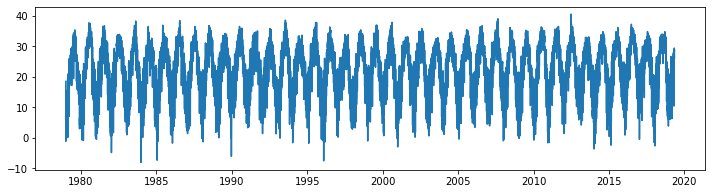

In [8]:
fig001, ax001 = plt.subplots(figsize=(12,3))
ax001.plot(atlanta_tmax['time'], atlanta_tmax)

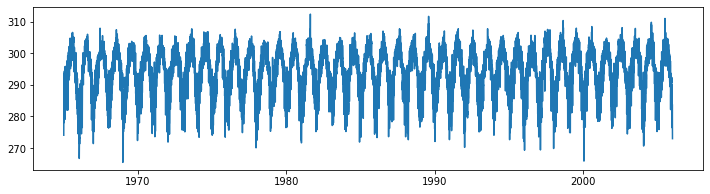

In [100]:
fig002, ax002 = plt.subplots(figsize=(12,3))
ax002.plot(time_p, atlanta_tmax1) #Model Atlanta

In [99]:
time_p = time1.dt.year + time1.dt.dayofyear/365
print (time_p)

<xarray.DataArray (time: 14965)>
array([1965.00274 , 1965.005479, 1965.008219, ..., 2005.994521, 2005.99726 ,
       2006.      ])
Coordinates:
  * time     (time) object 1965-01-01 00:00:00 ... 2005-12-31 00:00:00


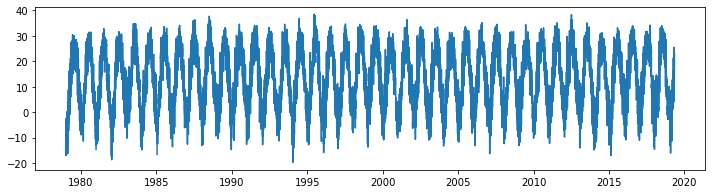

In [61]:
fig001, ax001 = plt.subplots(figsize=(12,3))
ax001.plot(cmich_tmax['time'], cmich_tmax)

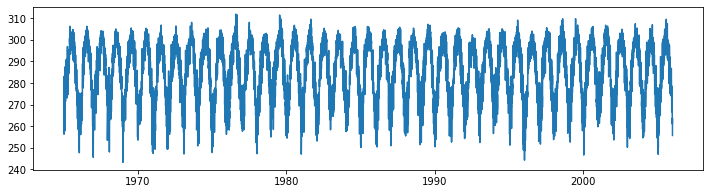

In [104]:
fig003, ax003 = plt.subplots(figsize=(12,3))
ax003.plot(time_p, cmich_tmax1)#Model CMU

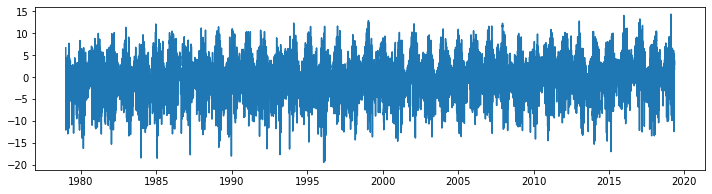

In [12]:
fig002, ax002 = plt.subplots(figsize=(12,3))
ax002.plot(atlanta_tmax_deseason['time'], atlanta_tmax_deseason) # OPTION 1: allow packages to deal with time

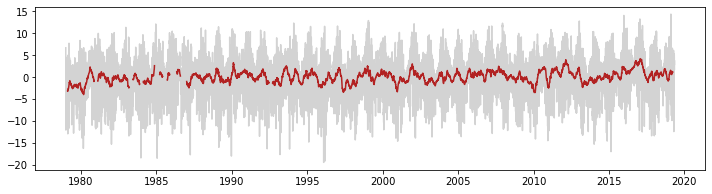

In [13]:
ig003, ax003 = plt.subplots(figsize=(12,3))
ax003.plot(atlanta_tmax_deseason['time'], atlanta_tmax_deseason, color='lightgray') # OPTION 1: allow packages to deal with time
smoothed_data = atlanta_tmax_deseason.rolling(time=90, center=True).mean()
ax003.plot(atlanta_tmax_deseason['time'], smoothed_data, color='firebrick')

<xarray.DataArray 'tmax' (time: 1240)>
array([33.37048 , 31.446325, 31.54364 , ..., 32.08574 , 31.461712, 31.561085],
      dtype=float32)
Coordinates:
    lat      float32 33.75
    lon      float32 275.75
  * time     (time) datetime64[ns] 1979-08-01 1979-08-02 ... 2018-08-31
Attributes:
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Other
    long_name:     Daily Maximum Temperature
    cell_methods:  time: mean
    valid_range:   [-90.  50.]
    avg_period:    0000-00-01 00:00:00
    dataset:       CPC Global Temperature
    comments:      GTS data and is gridded using the Shepard Algorithm
    max_period:    6z to 6z
    units:         degC
    var_desc:      Maximum Temperature


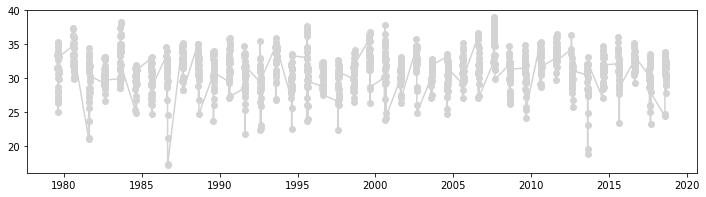

In [21]:
atlanta_tmax_aug = atlanta_tmax [atlanta_tmax['time.month'] == 8]
print (atlanta_tmax_aug)
atlanta_tmax_aug[atlanta_tmax_aug['time'].dt.year == 1981]  # <<-- NOTE this is kind of complicated way to do it, but this gets each day of july 1981
fig004, ax004 = plt.subplots(figsize=(12,3))
ax004.plot(atlanta_tmax_aug['time'], atlanta_tmax_aug, color='lightgray', marker='o')

NameError: name 'atlanta_tmax_aug' is not defined

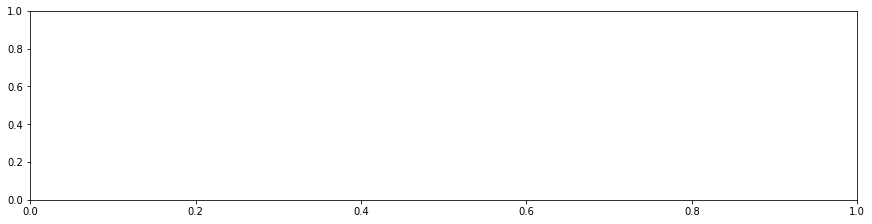

In [8]:
fig005, ax005 = plt.subplots(figsize=(12,3),constrained_layout=True)
years = set(atlanta_tmax_aug['time.year'].values)
n = len(years)
colors = mpl.cm.YlOrRd(np.linspace(0,1,n))

for i, year in enumerate(years):
    ax005.plot(np.arange(31), atlanta_tmax_aug[atlanta_tmax_aug['time'].dt.year == year], color=colors[i], label=year)
    

# ax005.plot(np.arange(31), sac_tmax_july.groupby('time.year').mean(dim='time'), color='red')    
ax005.set_xlabel("Day of July")
ax005.set_ylabel("T$_{\mathrm{max}}$ Anomaly [K]")
ax005.set_title("Atlanta", loc='left')
ax005.spines['top'].set_visible(False)
ax005.spines['right'].set_visible(False)
#fig005.legend(ncol=4, bbox_to_anchor=(0, 0.5, 1, 1), loc=5, borderaxespad=0.2)
fig005.savefig('/home/akwilson/Pictures/AtlantaObsTmaxAnom.tiff')

In [215]:
# given a timeseries and a month, plot all instances of that month

def degC_to_degF(C):
    return C * (9./5.) + 32.

def plot_stack_months(ts, month):
    month_length = {1: 31, 2: 28, 3: 31, 4: 30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
    month_data = ts[ts['time.month'] == month]
    fig, ax = plt.subplots(figsize=(10,5))
    ax2 = ax.twinx()
    ax2.set_ylabel('Fahrenheit')
    years = set(month_data['time.year'].values)
    n = len(years)
    colors = mpl.cm.YlOrRd(np.linspace(0,1,n))
    ndays = month_length[month]
    for i, year in enumerate(years):
        ax.plot(np.arange(ndays), month_data[month_data['time'].dt.year == year], color=colors[i], label=year)
    ax.set_xlabel("Day of Month")
    ax.set_ylabel("T$_{\mathrm{max}}$ [degC]")
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #fig.legend(ncol=4, bbox_to_anchor=(0, 0.5, 1, 1), loc=5, borderaxespad=0.2)
    y1,y2 = ax.get_ylim()
    ax2.set_ylim(degC_to_degF(y1), degC_to_degF(y2))
    ax.axhline(np.nanquantile(month_data,.90), color='k', linestyle='dashed', linewidth=2.5)
    return fig, ax

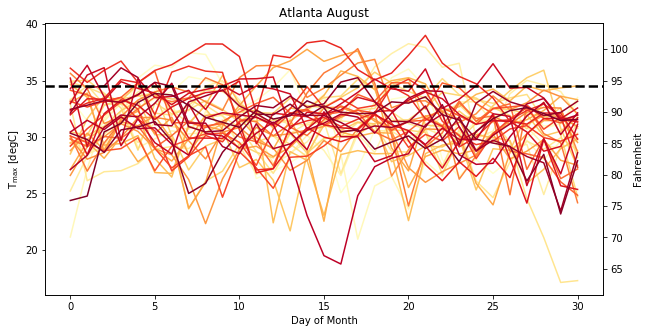

In [162]:
f006,ax006 = plot_stack_months(atlanta_tmax,8)
ax006.set_title('Atlanta August')
f006.savefig('/home/akwilson/Pictures/AtlantaObsTmaxAugDay.png')

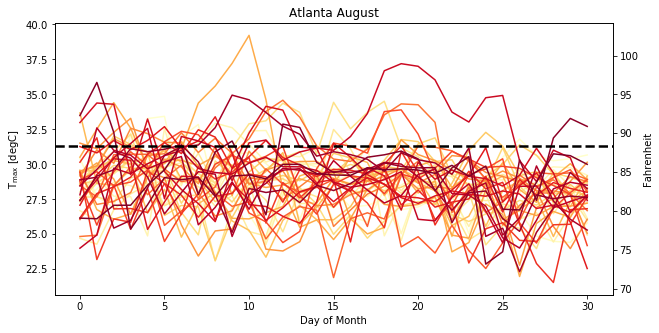

In [163]:
f009,ax009 = plot_stack_months(atlanta_tmax1- 273.15 ,8)
ax009.set_title('Atlanta August')
f009.savefig('/home/akwilson/Pictures/AtlantaModelTmaxAugDay.png')


Text(0.5, 1.0, 'CMU January')

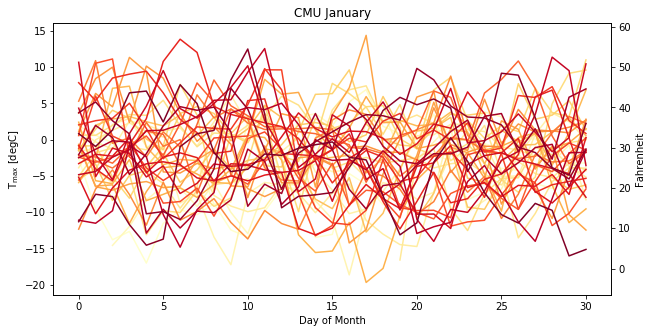

In [62]:
f008,ax008 = plot_stack_months(cmich_tmax,1)
ax008.set_title('CMU January')
#f006.savefig('/home/akwilson/Pictures/AtlantaObsTmaxAugDay.png')

In [213]:
def plot_hist_month(ts,month):
    
    month_data = ts[ts['time.month'] == month]
    h, edges = np.histogram(month_data, bins=np.arange(-20, 45, 2), density=True)
    bin_centers = edges[:-1:] + 0.5*np.diff(edges)  # take all but the last edge and add the half-width of the bin
    # to transform from "density" to hprime so that the sum of hprime = 1
    hprime = h / h.sum()  # has units of "fraction of data set" and sums to 1.0
    fig, ax = plt.subplots(constrained_layout=True)
    ax.bar(bin_centers, hprime)
    ax.set_ylabel('fraction')
    ax.axvline(np.nanquantile(month_data,.90), color='k', linestyle='dashed', linewidth=1.5)
    return fig, ax

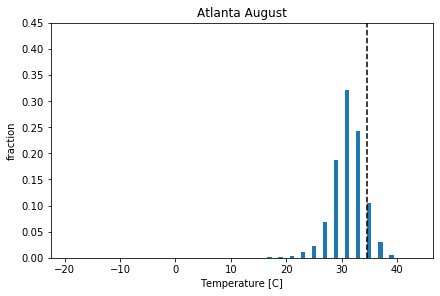

In [164]:
f007,ax007 = plot_hist_month(atlanta_tmax,8)
ax007.set_title('Atlanta August')
ax007.set_ylim(0,.45)
ax007.set_xlabel('Temperature [C]')
f007.savefig('/home/akwilson/Pictures/AtlantaObsTmaxAugDay.png')

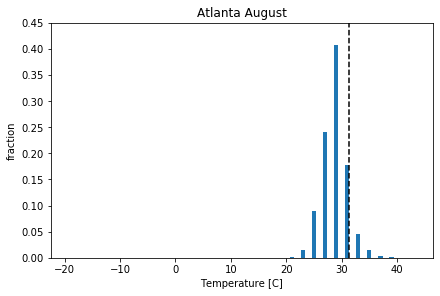

In [165]:
f001,ax001 = plot_hist_month(atlanta_tmax1 - 273.15,8)
ax001.set_title('Atlanta August')
ax001.set_ylim(0,.45)
ax001.set_xlabel('Temperature [C]')
f001.savefig('/home/akwilson/Pictures/AtlantaModelTmaxAugDay.png')


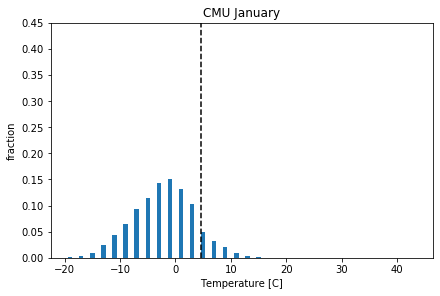

In [155]:
f009,ax009 = plot_hist_month(cmich_tmax,1)
ax009.set_title('CMU January')
ax009.set_ylim(0,.45)
ax009.set_xlabel('Temperature [C]')
f009.savefig('/home/akwilson/Pictures/CMUObsTmaxJanDayHist.png')

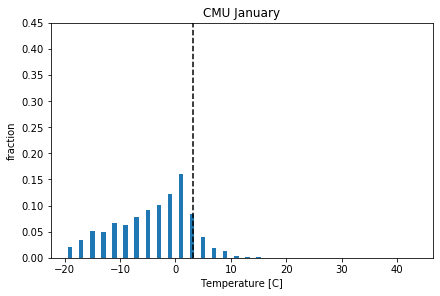

In [156]:
f002,ax002 = plot_hist_month(cmich_tmax1 - 273.15,1)
ax002.set_title('CMU January')
ax002.set_ylim(0,.45)
ax002.set_xlabel('Temperature [C]')
f002.savefig('/home/akwilson/Pictures/CMUModelTmaxJanDay.png')

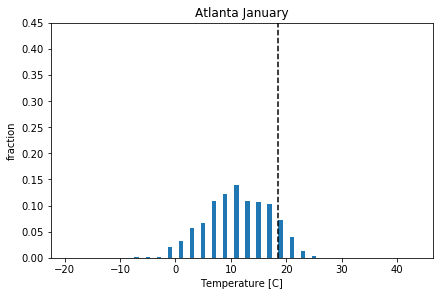

In [157]:
f007,ax007 = plot_hist_month(atlanta_tmax,1)
ax007.set_title('Atlanta January')
ax007.set_ylim(0,.45)
ax007.set_xlabel('Temperature [C]')
f007.savefig('/home/akwilson/Pictures/AtlObsTmaxJanDayHist.png')

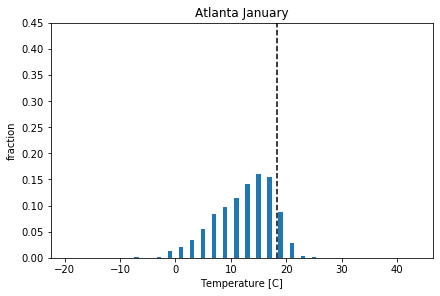

In [158]:
f002,ax002 = plot_hist_month(atlanta_tmax1 - 273.15,1)
ax002.set_title('Atlanta January')
ax002.set_ylim(0,.45)
ax002.set_xlabel('Temperature [C]')
f002.savefig('/home/akwilson/Pictures/AtlModelTmaxJanDay.png')

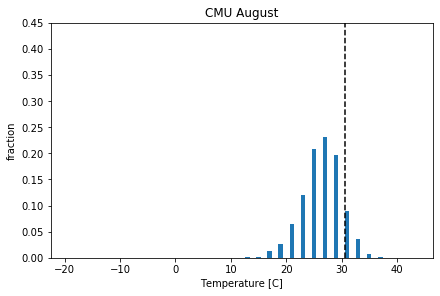

In [159]:
f009,ax009 = plot_hist_month(cmich_tmax,8)
ax009.set_title('CMU August')
ax009.set_ylim(0,.45)
ax009.set_xlabel('Temperature [C]')
f009.savefig('/home/akwilson/Pictures/CMUObsTmaxAugDayHist.png')

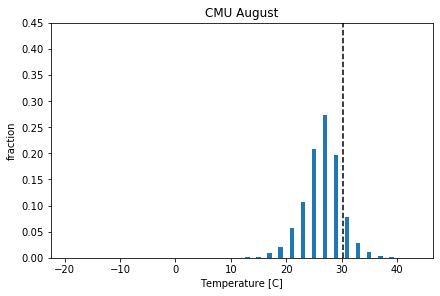

In [161]:
f004,ax004 = plot_hist_month(cmich_tmax1 - 273.15,8)
ax004.set_title('CMU August')
ax004.set_ylim(0,.45)
ax004.set_xlabel('Temperature [C]')
f004.savefig('/home/akwilson/Pictures/CMUModelTmaxAugDay.png')